<a href="https://colab.research.google.com/github/AtharvaTambat/WnCC-SoC-2022-QML/blob/main/Linear_Regression_Weather_Dataset_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Importing weather data from the .csv file to NumPy arrays**

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/weatherHistory.csv")

print(df)


                      Formatted Date        Summary Precip Type  \
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain   
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain   
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain   
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain   
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain   
...                              ...            ...         ...   
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0             9.472222                  7.388889      0.89            14.1197   
1             9.355556           

# **2. Extracting arrays of the required parameters from the .csv file**

In [ ]:
temp = np.array(df["Temperature (C)"])

print(temp)

[ 9.47222222  9.35555556  9.37777778 ... 22.03888889 21.52222222
 20.43888889]


In [ ]:
humidity = np.array(df["Humidity"])

print(humidity)

[0.89 0.86 0.89 ... 0.56 0.6  0.61]


# **3. Plotting the Humidity vs Temperature data**

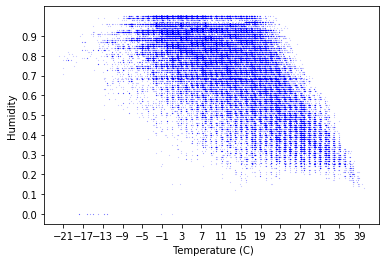

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(temp, humidity,s = 0.005, color="blue")

x_ticks = np.arange(int(np.min(temp)), np.max(temp), 4)
y_ticks = np.arange(0, np.max(humidity),0.1)

plt.xticks(x_ticks)
plt.yticks(y_ticks)

plt.xlabel(" Temperature (C)")
plt.ylabel("Humidity")

plt.show()

# **4. Applying Linear Regression to find the best fit curve**

In [ ]:
from sklearn import linear_model

temp = temp.reshape(-1,1)
humidity = humidity.reshape(-1,1)

reg = linear_model.LinearRegression()
reg.fit(temp, humidity)

slope = reg.coef_
slope = np.reshape(slope,1)
print(slope)

[-0.01293911]


In [ ]:
intercept = reg.intercept_
print(intercept)

[0.88929726]


# **5. Plotting the resulting curve along with the training data**

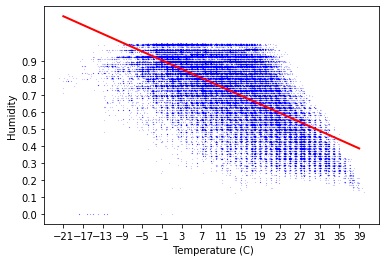

In [ ]:
plt.scatter(temp, humidity,s = 0.005, color="blue")

plt.xticks(x_ticks)
plt.yticks(y_ticks)

plt.xlabel(" Temperature (C)")
plt.ylabel("Humidity")

plt.plot(x_ticks, slope*x_ticks + intercept, color="red", linewidth=2)